<a href="https://www.kaggle.com/code/asilbekjon/cirrhosis-predict?scriptVersionId=239937466" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/multiclassificationtask/sample_submission.csv
/kaggle/input/multiclassificationtask/train.csv
/kaggle/input/multiclassificationtask/test.csv


Import

In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from xgboost import XGBClassifier

In [3]:
train=pd.read_csv('/kaggle/input/multiclassificationtask/train.csv')

In [4]:
test=pd.read_csv("/kaggle/input/multiclassificationtask/test.csv")

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15000 non-null  int64  
 1   N_Days         15000 non-null  float64
 2   Drug           8494 non-null   object 
 3   Age            15000 non-null  float64
 4   Sex            15000 non-null  object 
 5   Ascites        8502 non-null   object 
 6   Hepatomegaly   8492 non-null   object 
 7   Spiders        8491 non-null   object 
 8   Edema          15000 non-null  object 
 9   Bilirubin      15000 non-null  float64
 10  Cholesterol    6701 non-null   float64
 11  Albumin        15000 non-null  float64
 12  Copper         8399 non-null   float64
 13  Alk_Phos       8488 non-null   float64
 14  SGOT           8486 non-null   float64
 15  Tryglicerides  6666 non-null   float64
 16  Platelets      14436 non-null  float64
 17  Prothrombin    14984 non-null  float64
 18  Stage 

In [6]:
train.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,15000.000000,15000.000000,15000.000000,15000.000000,6701.000000,15000.000000,8399.000000,8488.000000,8486.000000,6666.000000,14436.000000,14984.000000,15000.000000
mean,7499.500000,1971.721267,19298.658267,1.845433,329.177302,3.526103,75.647339,1618.598233,106.483631,111.387886,252.917983,10.626111,3.024800
std,4330.271354,1333.733576,3797.580260,2.674859,180.320802,0.372268,74.830472,1767.240078,57.206017,55.056133,94.049175,0.731416,0.871303
min,0.000000,3.000000,400.000000,0.200000,120.000000,0.500000,2.000000,3.400000,0.900000,19.000000,32.000000,9.000000,1.000000
25%,3749.750000,1095.000000,16658.000000,0.600000,242.000000,3.290000,31.000000,720.000000,71.000000,80.000000,181.000000,10.100000,2.000000
50%,7499.500000,1786.000000,19544.000000,0.900000,280.000000,3.580000,52.000000,1072.000000,97.650000,99.000000,248.000000,10.600000,3.000000
75%,11249.250000,2635.000000,22347.000000,1.800000,364.000000,3.770000,89.000000,1664.000000,130.200000,133.000000,311.000000,11.000000,4.000000
max,14999.000000,38320.000000,129398.000000,28.000000,2078.000000,4.640000,662.000000,13862.400000,2653.000000,1669.000000,1024.000000,18.000000,4.000000


In [7]:
train.isnull().sum()

id                  0
N_Days              0
Drug             6506
Age                 0
Sex                 0
Ascites          6498
Hepatomegaly     6508
Spiders          6509
Edema               0
Bilirubin           0
Cholesterol      8299
Albumin             0
Copper           6601
Alk_Phos         6512
SGOT             6514
Tryglicerides    8334
Platelets         564
Prothrombin        16
Stage               0
Status              0
dtype: int64

In [8]:
train['Age'] = train['Age']//366

In [9]:
train.Status.value_counts()

Status
C     10053
D      4565
CL      381
Y         1
Name: count, dtype: int64

In [10]:
train=train[train['Status'] !='Y']

In [11]:
#encode
encode=LabelEncoder()
train['Status']=encode.fit_transform(train.Status.values)
train.Status.value_counts()
# 0- C
# 1-CL
# 2-D

Status
0    10053
2     4565
1      381
Name: count, dtype: int64

In [12]:
train.drop(['id'],axis=1)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,2178.0,D-penicillamine,44.0,F,N,N,N,N,0.5,263.0,3.20,43.0,1110.0,106.95,67.0,430.0,9.6,3.0,0
1,2644.0,D-penicillamine,48.0,F,N,N,N,N,0.8,280.0,3.60,22.0,678.0,62.00,80.0,427.0,13.0,3.0,0
2,3069.0,Placebo,48.0,F,N,N,N,N,1.1,408.0,4.40,54.0,2108.0,142.60,137.0,203.0,10.6,3.0,0
3,2216.0,Placebo,52.0,F,N,Y,Y,N,0.8,252.0,3.70,36.0,843.0,55.80,56.0,336.0,9.6,4.0,0
4,2256.0,Placebo,59.0,F,N,N,N,N,4.7,348.0,3.06,464.0,961.0,120.90,146.0,298.0,11.0,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,1783.0,Placebo,63.0,F,N,Y,N,S,1.3,243.0,3.76,58.0,944.0,97.00,93.0,233.0,9.9,4.0,0
14996,3492.0,NaN,35.0,F,NaN,NaN,NaN,N,0.7,NaN,4.03,NaN,NaN,NaN,NaN,273.0,10.3,2.0,0
14997,1170.0,NaN,61.0,F,NaN,NaN,NaN,N,0.8,NaN,3.14,NaN,NaN,NaN,NaN,280.0,10.6,3.0,0
14998,1433.0,Placebo,59.0,F,N,N,N,N,0.6,280.0,4.04,52.0,843.0,28.38,189.0,334.0,10.0,2.0,0


In [13]:
#categirical and numeric columns
categorical=['Drug','Sex','Ascites','Hepatomegaly','Spiders','Edema']
numeric=['N_Days','Age','Bilirubin','Cholesterol','Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin','Stage']

Pipeline

In [14]:
#numeric pipeline
num_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler())
])
#categorical pipeline
cat_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder())
])
#full pipeline
full_pipeline=ColumnTransformer([
    ('num',num_pipeline,numeric),
    ('cat',cat_pipeline,categorical)
])

In [15]:
X=train.drop('Status',axis=1)
y=train['Status'].copy()

In [16]:
y.value_counts()

Status
0    10053
2     4565
1      381
Name: count, dtype: int64

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [18]:
X_train_prepared=full_pipeline.fit_transform(X_train)
X_test_prepared=full_pipeline.fit_transform(X_test)

In [19]:
RF=RandomForestClassifier()
RF.fit(X_train_prepared,y_train)
y_predict=RF.predict(X_test_prepared)
y_proba = RF.predict_proba(X_test_prepared)
logloss = log_loss(y_test, y_proba)
print(classification_report(y_test,y_predict))
print('Accuracy',accuracy_score(y_test,y_predict))
print('Log Loss:', logloss)


              precision    recall  f1-score   support

           0       0.86      0.94      0.89      2004
           1       1.00      0.07      0.13        74
           2       0.82      0.71      0.76       922

    accuracy                           0.85      3000
   macro avg       0.89      0.57      0.59      3000
weighted avg       0.85      0.85      0.83      3000

Accuracy 0.8456666666666667
Log Loss: 0.4523625209483099


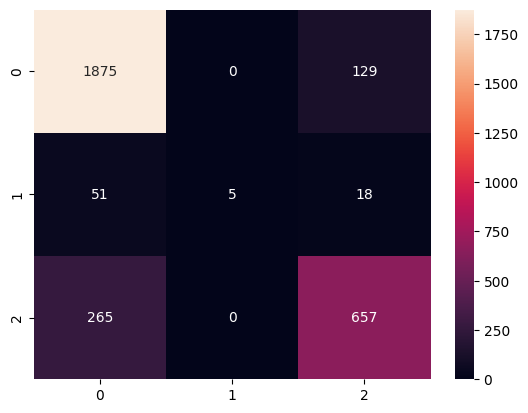

In [20]:
conf_mat=confusion_matrix(y_test,y_predict)
sns.heatmap(conf_mat,annot=True,fmt='g')
plt.show()

In [21]:
DT=DecisionTreeClassifier()
DT.fit(X_train_prepared,y_train)
y_predict_1=DT.predict(X_test_prepared)
y_proba_1 = DT.predict_proba(X_test_prepared)
logloss_1 = log_loss(y_test, y_proba_1)
print(classification_report(y_test,y_predict_1))
print('Accuracy',accuracy_score(y_test,y_predict_1))
print('Log Loss:', logloss_1)

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      2004
           1       0.10      0.12      0.11        74
           2       0.66      0.66      0.66       922

    accuracy                           0.76      3000
   macro avg       0.53      0.54      0.53      3000
weighted avg       0.76      0.76      0.76      3000

Accuracy 0.7596666666666667
Log Loss: 8.662491364517821


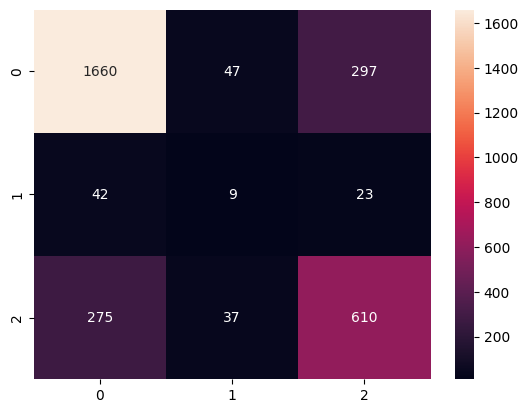

In [22]:
conf_mat=confusion_matrix(y_test,y_predict_1)
sns.heatmap(conf_mat,annot=True,fmt='g')
plt.show()

In [23]:
GB=GradientBoostingClassifier()
GB.fit(X_train_prepared,y_train)
y_predict_2=GB.predict(X_test_prepared)
y_proba_2= GB.predict_proba(X_test_prepared)
logloss_2= log_loss(y_test, y_proba_2)
print(classification_report(y_test,y_predict_2))
print('Accuracy',accuracy_score(y_test,y_predict_2))
print('Log Loss:', logloss_2)

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      2004
           1       0.50      0.14      0.21        74
           2       0.82      0.72      0.76       922

    accuracy                           0.85      3000
   macro avg       0.73      0.59      0.62      3000
weighted avg       0.84      0.85      0.84      3000

Accuracy 0.847
Log Loss: 0.3900109396574978


In [24]:
XGB=XGBClassifier()
XGB.fit(X_train_prepared,y_train)
y_predict_3 = XGB.predict(X_test_prepared)
y_proba_3= XGB.predict_proba(X_test_prepared)
logloss_3= log_loss(y_test, y_proba_3)
print(classification_report(y_test, y_predict_3))
print("Accuracy:", accuracy_score(y_test,y_predict_3))
print('Log Loss:', logloss_3)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2004
           1       0.50      0.12      0.20        74
           2       0.86      0.62      0.72       922

    accuracy                           0.83      3000
   macro avg       0.73      0.57      0.60      3000
weighted avg       0.83      0.83      0.82      3000

Accuracy: 0.8333333333333334
Log Loss: 0.47684069437422544


I tested 4 moduls and Gradient Boosting Classifier gives best result with 85% accuracy and 0.39 longloss

In [25]:
test

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,15000,22646.0,NaN,22646.0,F,NaN,NaN,NaN,N,1.4,NaN,3.34,NaN,NaN,NaN,NaN,190.0,11.0,4.0
1,15001,2149.0,NaN,18993.0,F,NaN,NaN,NaN,N,0.9,NaN,3.24,NaN,NaN,NaN,NaN,233.0,9.0,2.0
2,15002,3850.0,D-penicillamine,16050.0,M,N,N,N,N,1.0,460.0,3.64,75.0,2148.0,102.30,118.0,172.0,10.6,3.0
3,15003,2419.0,D-penicillamine,20354.0,F,N,N,N,N,0.6,258.0,3.96,31.0,642.0,70.00,83.0,336.0,10.8,2.0
4,15004,1086.0,NaN,23376.0,F,NaN,NaN,NaN,N,4.4,NaN,4.40,NaN,NaN,NaN,NaN,447.0,10.3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24995,2106.0,Placebo,16728.0,F,N,N,N,N,1.1,1128.0,3.35,91.0,815.0,127.10,166.0,421.0,9.6,1.0
9996,24996,186.0,D-penicillamine,13073.0,M,N,Y,N,N,0.6,267.0,3.02,225.0,728.0,120.90,90.0,142.0,12.3,4.0
9997,24997,3458.0,D-penicillamine,20296.0,F,N,N,N,N,0.9,NaN,3.35,136.0,1995.0,128.00,NaN,243.0,10.6,2.0
9998,24998,2891.0,D-penicillamine,20254.0,F,N,N,N,N,0.8,NaN,3.75,63.0,674.0,26.35,NaN,325.0,10.0,1.0


In [26]:
test_id=test['id'].copy()

In [27]:
test['Age']=test['Age']//366

In [28]:
test.drop('id',axis=1)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,22646.0,NaN,61.0,F,NaN,NaN,NaN,N,1.4,NaN,3.34,NaN,NaN,NaN,NaN,190.0,11.0,4.0
1,2149.0,NaN,51.0,F,NaN,NaN,NaN,N,0.9,NaN,3.24,NaN,NaN,NaN,NaN,233.0,9.0,2.0
2,3850.0,D-penicillamine,43.0,M,N,N,N,N,1.0,460.0,3.64,75.0,2148.0,102.30,118.0,172.0,10.6,3.0
3,2419.0,D-penicillamine,55.0,F,N,N,N,N,0.6,258.0,3.96,31.0,642.0,70.00,83.0,336.0,10.8,2.0
4,1086.0,NaN,63.0,F,NaN,NaN,NaN,N,4.4,NaN,4.40,NaN,NaN,NaN,NaN,447.0,10.3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2106.0,Placebo,45.0,F,N,N,N,N,1.1,1128.0,3.35,91.0,815.0,127.10,166.0,421.0,9.6,1.0
9996,186.0,D-penicillamine,35.0,M,N,Y,N,N,0.6,267.0,3.02,225.0,728.0,120.90,90.0,142.0,12.3,4.0
9997,3458.0,D-penicillamine,55.0,F,N,N,N,N,0.9,NaN,3.35,136.0,1995.0,128.00,NaN,243.0,10.6,2.0
9998,2891.0,D-penicillamine,55.0,F,N,N,N,N,0.8,NaN,3.75,63.0,674.0,26.35,NaN,325.0,10.0,1.0


In [29]:
test_prepared=full_pipeline.fit_transform(test)

In [30]:
y_test_predict=GB.predict(test_prepared)
y_test_proba=GB.predict_proba(test_prepared)
y_test_proba

array([[0.12533142, 0.0039599 , 0.87070868],
       [0.92348965, 0.00689491, 0.06961544],
       [0.78734622, 0.02771813, 0.18493565],
       ...,
       [0.89267496, 0.00896075, 0.09836429],
       [0.95111749, 0.00375018, 0.04513234],
       [0.73850781, 0.05247567, 0.20901652]])

Submission

In [31]:
# 0- C
# 1-CL
# 2-D
submission_cirrhosis= pd.DataFrame({
    'id':test_id,
    'Status_C':y_test_proba[:,0],
    'Status_CL':y_test_proba[:,1],
    'Status_D':y_test_proba[:,2]
})
submission_cirrhosis.to_csv('submission_cirrhosis.csv',index=False)

In [32]:
# Saving Model
import pickle

filename = 'GradientBoostingClassifier.pkl'
with open(filename, 'wb') as file:
    pickle.dump(GB, file)

In [33]:
submission_cirrhosis

,id,Status_C,Status_CL,Status_D
0,15000,0.125331,0.003960,0.870709
1,15001,0.923490,0.006895,0.069615
2,15002,0.787346,0.027718,0.184936
3,15003,0.967780,0.002761,0.029458
4,15004,0.590394,0.104007,0.305599
...,...,...,...,...
9995,24995,0.847820,0.100349,0.051831
9996,24996,0.070105,0.025425,0.904470
9997,24997,0.892675,0.008961,0.098364
9998,24998,0.951117,0.003750,0.045132
